In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from pandas.tseries.offsets import BDay
import plotly.graph_objects as go
from ta.trend import ema_indicator

In [29]:
hist = pd.read_csv("dataset/nvidia_data.csv")

### Simple Moving Averages

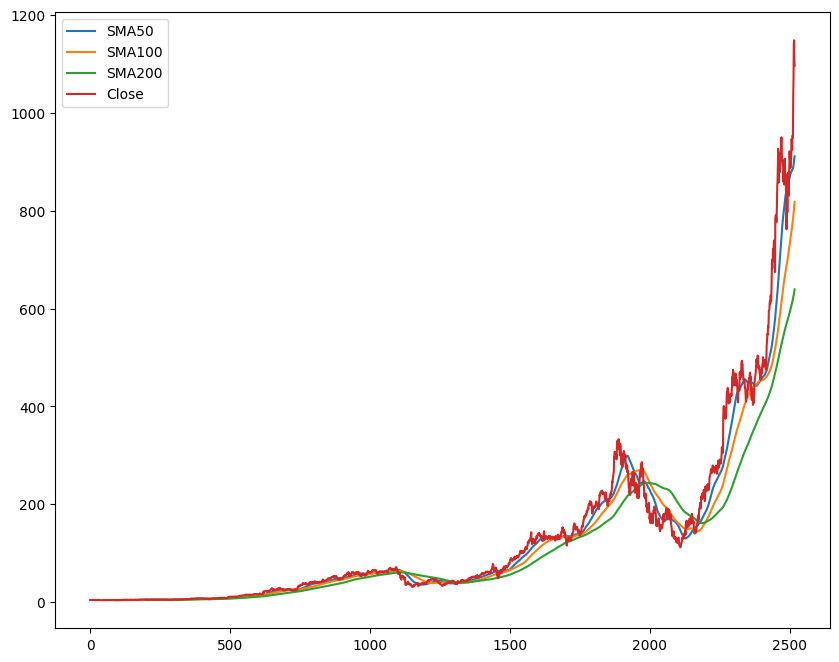

In [30]:
hist['sma50'] = hist['Close'].rolling(50).mean()
hist['sma100'] = hist['Close'].rolling(100).mean()
hist['sma200'] = hist['Close'].rolling(200).mean()

plt.figure(figsize=(10, 8))
hist['sma50'].plot(label='SMA50')
hist['sma100'].plot(label='SMA100')
hist['sma200'].plot(label='SMA200')


hist['Close'].plot(label='Close')
plt.legend()
plt.show()

### Exponential Moving Averages

In [31]:
hist['EMA12'] = ema_indicator(hist['Close'], window=12)
hist['EMA26'] = ema_indicator(hist['Close'], window=26)
hist['EMA50'] = ema_indicator(hist['Close'], window=50)
hist['EMA100'] = ema_indicator(hist['Close'], window=100)

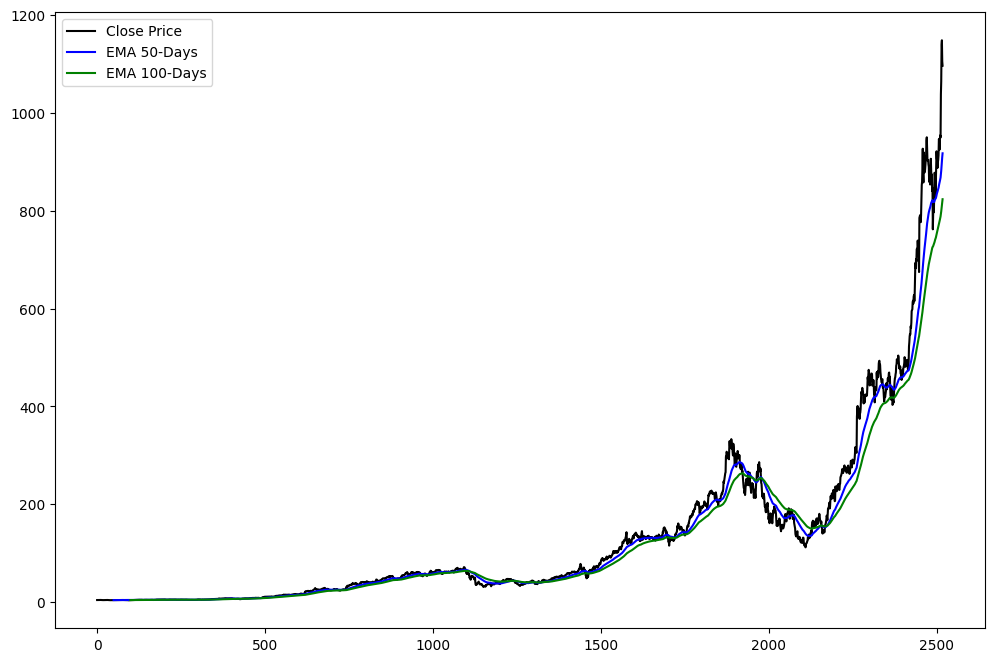

In [32]:
plt.figure(figsize=(12, 8))
hist['Close'].plot(color='k', label='Close Price')
hist['EMA50'].plot(color='b', label='EMA 50-Days')
hist['EMA100'].plot(color='g', label='EMA 100-Days')
plt.legend()
plt.show()

### MACD - Moving Average Convergence/Divergence

<Axes: title={'center': 'MACD'}>

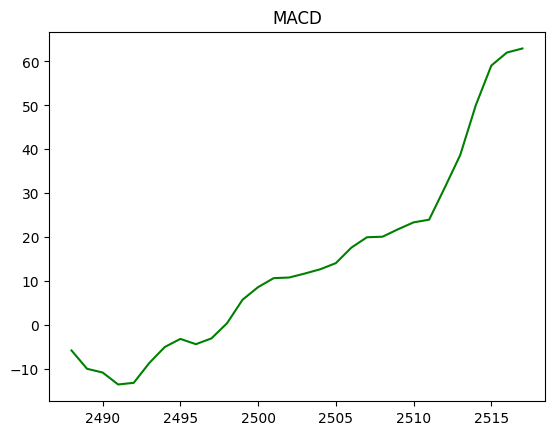

In [33]:
column = "Close"

hist['EMA-12'] = hist[column].ewm(span=12, adjust=False).mean()
hist['EMA-26'] = hist[column].ewm(span=26, adjust=False).mean()

hist['MACD'] = hist['EMA-12'] - hist['EMA-26']

hist.tail(30)['MACD'].plot(color='g', label='MACD', title='MACD')

### Relative Strength Index (RSI)

<Axes: title={'center': 'RSI'}>

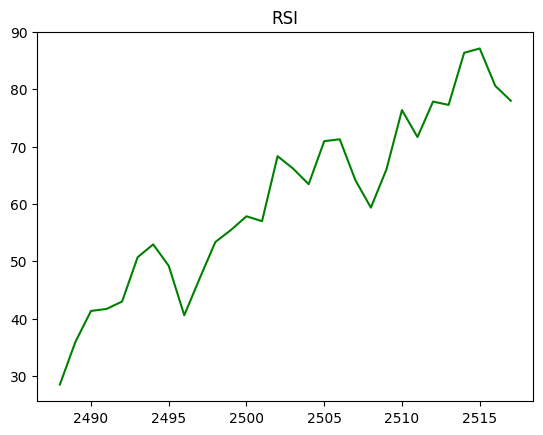

In [34]:
delta = hist['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()

rs = gain / loss
hist['RSI'] = 100 - (100 / (1 + rs))

hist.tail()

hist.tail(30)['RSI'].plot(color='g', label='RSI', title='RSI')

### Candlestick Charts

In [35]:
def show_candlestick(df: pd.DataFrame) -> None:
    
    fig = go.Figure(data=[go.Candlestick(x=df.index,
                        open=df['Open'],
                        high=df['High'],
                        low=df['Low'],
                        close=df['Close'])]
                   )

    fig.update_layout(
        margin=dict(l=20,r=20,t=60,b=20),
        height=500,
        paper_bgcolor="LightSteelBlue",
        title="NVDA",
    )

    fig.show()

In [36]:
hist_last30 = hist.iloc[-30:]

show_candlestick(hist_last30)